In [1]:
from math import pi
import numpy as np
from scipy import signal
import coupledIIR as cf
import tf2ca as tf
import matplotlib.pyplot as plt
import IPython

Linkwitz-Riley filter is derived from butterworth filter, decomposition

$$
\begin{align}
H_{\text{L-R}{lp}}(z) &= {H_{\text{BW}{lp}}(z)}^2 = \frac{B_{lp}(z)B_{lp}(z)}{A_{lp}(z)A_{lp}(z)} \\
H_{\text{L-R}{hp}}(z) &= {H_{\text{BW}{hp}}(z)}^2 = \frac{B_{hp}(z)B_{hp}(z)}{A_{hp}(z)A_{hp}(z)} \\
H_{\text{BW}{lp}}(z) &= \frac{B_{lp}(z)}{A_{lp}(z)} = \frac{[H_1(z) + H_2(z)]}{2}\\
H_{\text{BW}{hp}}(z) &= \frac{B_{hp}(z)}{A_{hp}(z)} = \frac{[H_1(z) - H_2(z)]}{2}\\
\end{align}
$$

In [2]:
LP, HP = cf.LinkwitzRiley36dB(1200, 48000, False)
print("LR num: ", LP[0])
print("LR den: ", LP[1])

a0 = LP[1][0]
print("LR num(norm): ", LP[0] / a0)
print("LR den(norm): ", LP[1] / a0)

LR num:  [9.27338042e-07 5.56402825e-06 1.39100706e-05 1.85467608e-05
 1.39100706e-05 5.56402825e-06 9.27338042e-07]
LR den:  [  5.34455868 -28.71265165  64.42732824 -77.27953737  52.25593581
 -18.88498002   2.84940566]
LR num(norm):  [1.73510686e-07 1.04106412e-06 2.60266029e-06 3.47021372e-06
 2.60266029e-06 1.04106412e-06 1.73510686e-07]
LR den(norm):  [  1.          -5.37231479  12.05475178 -14.45947964   9.77740894
  -3.53349662   0.53314143]


Cascaded Butterworth 18dB to reconstruct Linkwitz-Riley filter 36dB

In [3]:
LP, HP = cf.Butterworth18dB(1200, 48000, False)
print("BW num: ", LP[0])
print("BW den: ", LP[1])
print("LR num(BW cascaded): ", np.convolve(LP[0],LP[0]))
print("LR den(BW cascaded): ", np.convolve(LP[1],LP[1]))

d1, d2, beta = tf.tf2ca(LP[0], LP[1])
num, den = tf.pos(d1, d2, beta)
print("num(reconstructed): ", np.convolve(num,num))
print("den(reconstructed): ", np.convolve(den,den))

BW num:  [0.00096298 0.00288895 0.00288895 0.00096298]
BW den:  [ 2.31183016 -6.20993968  5.59383166 -1.68801827]
LR num(BW cascaded):  [9.27338042e-07 5.56402825e-06 1.39100706e-05 1.85467608e-05
 1.39100706e-05 5.56402825e-06 9.27338042e-07]
LR den(BW cascaded):  [  5.34455868 -28.71265165  64.42732824 -77.27953737  52.25593581
 -18.88498002   2.84940566]
num(reconstructed):  [1.73510686e-07+0.j 1.04106412e-06+0.j 2.60266029e-06+0.j
 3.47021372e-06+0.j 2.60266029e-06+0.j 1.04106412e-06+0.j
 1.73510686e-07+0.j]
den(reconstructed):  [  1.        +0.j  -5.37231479+0.j  12.05475178+0.j -14.45947964+0.j
   9.77740894+0.j  -3.53349662+0.j   0.53314143+0.j]


The summation transfer function of complementary filter is an allpass filter 
$$
\begin{align}
H_{apf} &= H_{\text{BW}{hp}}(z) + H_{\text{BW}{lp}}(z) = \frac{B_{hp}(z)}{A_{hp}(z)} + \frac{B_{lp}(z)}{A_{lp}(z)} \\
&= \frac{[H_1(z) - H_2(z)]}{2} + \frac{[H_1(z) + H_2(z)]}{2} \\
&= H_1(z)
\end{align}
$$

We need this allpass filter derivation in filterbank design to compensate counterpart band.

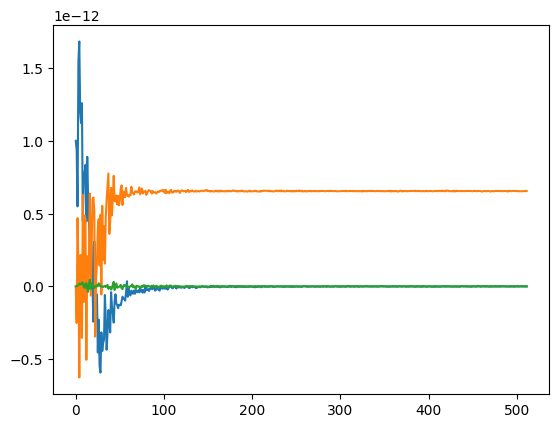

In [4]:
b0, a0 = tf.neg(d1, d2, beta)
b1, a1 = tf.pos(d1, d2, beta)

w1, h1 = signal.freqz(LP[0] + HP[0], LP[1])
w2, h2 = signal.freqz(b0 + b1, a0)
w3, h3 = signal.freqz(d1[::-1], d1)

plt.plot(np.log10(np.abs(h1)) * 20)
plt.plot(np.log10(np.abs(h2)) * 20)
plt.plot(np.log10(np.abs(h3)) * 20)
plt.show()